In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.trapmath import * 
from trajectory.plot import *
from trajectory.profiles  import *
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
assert maxmin(100, 150, 200) == 150
assert maxmin(100, 90,200) == 100
assert maxmin(100, 290,200) == 200

V_C guess =  [7061.523675802235, 11063.476324197765] V_C calc =  -2265 V_C param =  5000


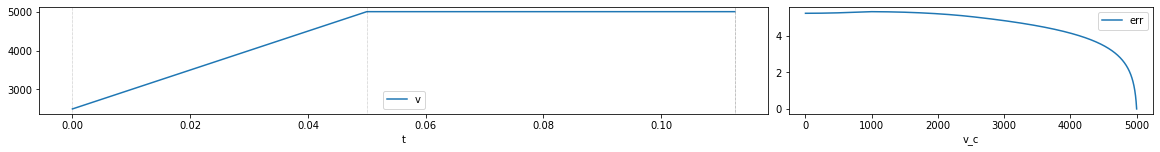

V_C guess =  [9561.523675802235, 13563.476324197765] V_C calc =  -2265 V_C param =  5000


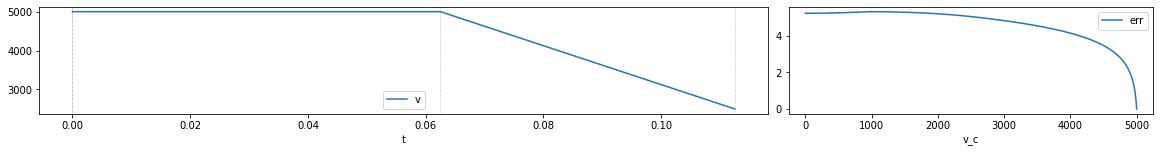

V_C guess =  [1249.9999999999993, 1600.0000000000007] V_C calc =  1249.9999999999993 V_C param =  1250


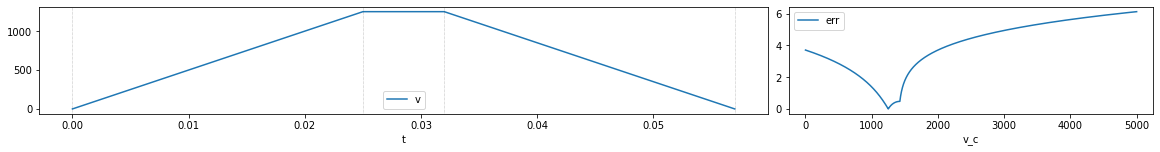

V_C guess =  [625.0000000000002, 1599.9999999999998] V_C calc =  625.0000000000002 V_C param =  625


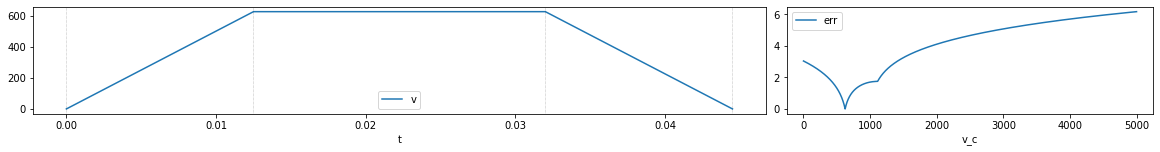

V_C guess =  [623.3702567675425, 1606.7497432324578] V_C calc =  625 V_C param =  625


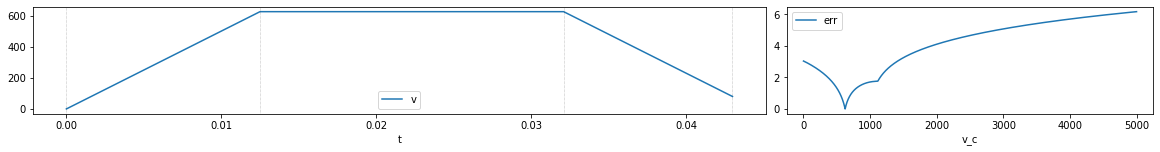

V_C guess =  [4960.318720020456] V_C calc =  5000 V_C param =  5000


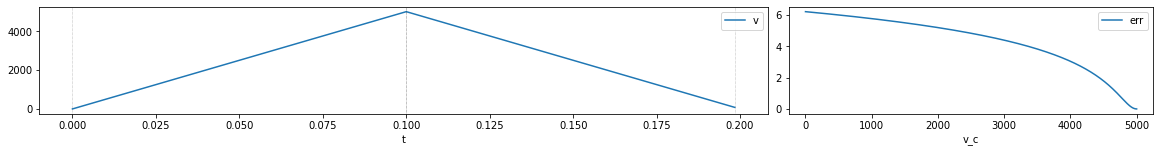

V_C guess =  [4717.460485127166] V_C calc =  5000 V_C param =  5000


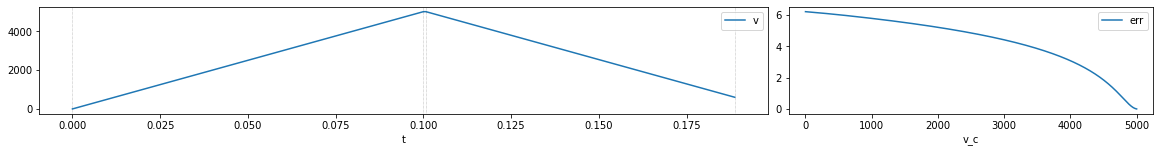

V_C guess =  [5599.11380683575] V_C calc =  5000 V_C param =  5000


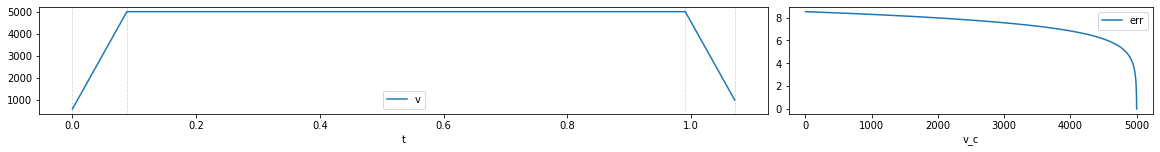

V_C guess =  [2884.276831295586, 3389.723168704414] V_C calc =  2500 V_C param =  2500


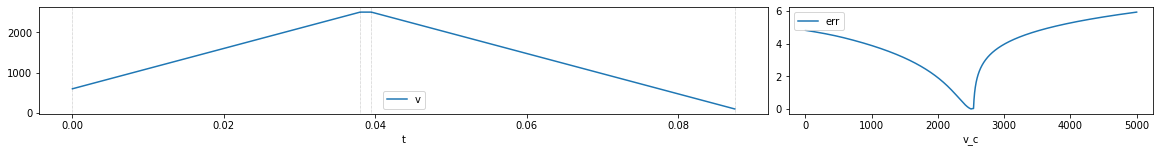

In [87]:
%reload_ext autoreload
%autoreload 2
%run startup.py

errors = [
Params(x=500, t=0.1125, t_a=0.05, t_c=0.0625, t_d=0, x_a=187.5, x_c=312.5, x_d=0, v_0=2500, v_c=5000, v_1=5000, v_0_max=None, v_0_min=0, 
       v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
       ip=InputParams(x=500, v_0=2500, v_1=5000, v_max=5000, a_max=50000), flag=None, recalcs=0),
Params(x=500, t=0.1125, t_a=0, t_c=0.0625, t_d=0.05, x_a=0, x_c=312.5, x_d=187.5, v_0=5000, v_c=5000, v_1=2500, v_0_max=None, v_0_min=0, 
       v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, ip=InputParams(x=500, v_0=5000, v_1=2500, v_max=5000, a_max=50000), 
       flag=None, recalcs=0),
Params(x=40, t=0.057, t_a=0.025, t_c=0.007, t_d=0.025, x_a=15.625, x_c=8.75, x_d=15.625, v_0=0, v_c=1250, v_1=0, v_0_max=None, 
       v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
       ip=InputParams(x=40, v_0=0, v_1=0, v_max=5000, a_max=50000), flag=None, recalcs=2),
Params(x=20, t=0.0445, t_a=0.0125, t_c=0.0195, t_d=0.0125, x_a=3.90625, x_c=12.1875, x_d=3.90625, v_0=0, v_c=625, 
           v_1=0, v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=20, v_0=0, v_1=0, v_max=5000, a_max=50000), flag=None, recalcs=3),
Params(x=20, t=0.0430024, t_a=0.0125, t_c=0.0196024, t_d=0.0109, x_a=3.90625, x_c=12.2515, x_d=3.84225, v_0=0, v_c=625, 
           v_1=80, v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=20, v_0=0, v_1=80, v_max=5000, a_max=50000), flag=None, recalcs=3),
Params(x=500, t=0.1984128, t_a=0.1, t_c=1.279999999999859e-05, t_d=0.0984, x_a=250.0, x_c=0.06399999999999295, x_d=249.936, v_0=0, 
           v_c=5000, v_1=80, v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=500, v_0=0, v_1=80, v_max=5000, a_max=50000), flag=None, recalcs=0),
Params(x=500, t=0.18872, t_a=0.1, t_c=0.0007200000000000046, t_d=0.088, x_a=250.0, x_c=3.6000000000000227, x_d=246.39999999999998, v_0=0, v_c=5000, v_1=600, v_0_max=None, 
           v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=500, v_0=0, v_1=600, v_max=5000, a_max=50000), flag=None, recalcs=0),
Params(x=5000, t=1.0707200000000001, t_a=0.088, t_c=0.9027200000000001, t_d=0.08, x_a=246.39999999999998, x_c=4513.6, x_d=240.0, 
           v_0=600, v_c=5000, v_1=1000, v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=5000, v_0=600, v_1=1000, v_max=5000, a_max=50000), flag=None, recalcs=0),
Params(x=125, t=0.08748, t_a=0.038, t_c=0.0014799999999999982, t_d=0.048, x_a=58.9, x_c=3.6999999999999957, x_d=62.4, v_0=600, v_c=2500, v_1=100, 
       v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
       ip=InputParams(x=125, v_0=600, v_1=100, v_max=5000, a_max=50000), flag=None, recalcs=1)
]
       
p = errors[-1]


def f(p):
    fig = plt.figure(constrained_layout=True, figsize=(16,2))
    gs = plt.GridSpec(1, 3, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0:2])
    # identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
    ax2 = fig.add_subplot(gs[0, 2:])
    

    ag = attrgetter(*'x t v_0 v_1 v_max a_max'.split())

    (x, _, v_0, v_1, v_max, a_max) = ag(p)

    print("V_C guess = ", calc_v_c(*ag(p)), "V_C calc = ", hex_v_c(*ag(p)), "V_C param = ", p.v_c)

    t = p.t

    f = make_area_error_func(x, t, v_0, v_1, v_max, a_max)

    rows = []
    for vc in range(0, v_max+1, 1):
        rows.append(dict(v_c=vc, err=np.log(f(vc)+1)))

    plot_params(p, ax=ax1)
    pd.DataFrame(rows).plot(x='v_c',y='err', ax=ax2)
    plt.show()

    
for p in errors[::
    f(p)


GridSpec(1, 3)[0:1, 0:1]

<Figure size 432x288 with 0 Axes>

In [25]:
p = Params(x=20, t=0.0445, t_a=0.0125, t_c=0.0195, t_d=0.0125, x_a=3.90625, x_c=12.1875, x_d=3.90625, v_0=0, v_c=625, 
           v_1=0, v_0_max=None, v_0_min=0, v_1_max=None, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
           ip=InputParams(x=20, v_0=0, v_1=0, v_max=5000, a_max=50000), flag=None, recalcs=3)

print(hex_area_p(p), p.v_c, p.t_d*p.a_max)

(x, t, v_0, v_1, v_max, a_max) = ag(p)

v_c = [a_max*t/2 - sqrt(a_max*(a_max*t**2 - 4*x))/2,
 a_max*t/2 + sqrt(a_max*(a_max*t**2 - 4*x))/2]

v_c, hex_area(t, v_0, 625, v_1, a_max)

20.0 625 625.0


([625.0000000000002, 1599.9999999999998], 20.0)

In [ ]:
# The exta error function ( the "collar" on fhte function ) fails in this case
# because it has a minimum at 2500, which is outside the valid range 

(x, t, v_0, v_1, v_max, a_max) = (60.0-1, 0.039498427657407166, 1000, 1000, 5000, 50000)
(x, t, v_0, v_1, v_max, a_max) = (0.999999999999998, 0.0009878030638383916, 1000, 1000, 5000, 50000)
f = make_area_error_func(x, t, v_0, v_1, v_max, a_max)

rows = []
for vc in range(-200, int(v_max*1.1), 10):
    rows.append(dict(v_c=vc, err=f(vc)))
    
pd.DataFrame(rows).plot(x='v_c',y='err')

###

v_c = hex_v_c(*ag(p))
print("V_C", v_c)
update_params(p, .1) # Should not crash

<AxesSubplot:xlabel='v_c'>

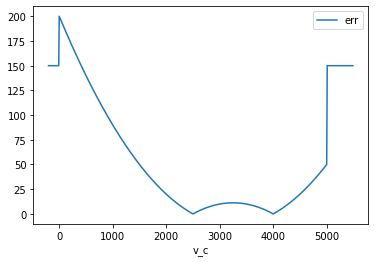

In [69]:

def make_area_error_func(x, t, v_0, v_1, v_max, a_max):
    def f(v_c):

        if v_c < 0 or v_c > v_max:
            return 150
        try:
            x_ = hex_area(t, v_0, v_c, v_1, a_max)

        except TrapMathError:
            return 150

        return abs(x - x_)

    return f


f = make_area_error_func(100, .05, 3000, 1000, v_max, a_max)

rows = []
for vc in range(-200, int(v_max*1.1), 10):
    rows.append(dict(v_c=vc, err=f(vc)))
    
pd.DataFrame(rows).plot(x='v_c',y='err')

###



In [ ]:
v_max/a_max


In [67]:
hex_area(.05, 3000, 2000, 1000, a_max)

80.0

<AxesSubplot:xlabel='t'>

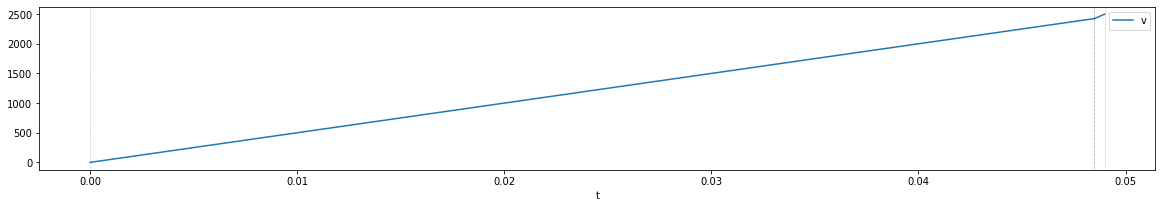

In [39]:
%reset -f 
# Should not crash
from trajectory.trapmath import * 
from trajectory.plot import * 

plot_params(init_parameters(60, 0, 2500, 5000, 50000))

In [40]:
%reset -f 
# Should not crash
from trajectory.trapmath import * 
from trajectory.plot import * 

a_max = 50_000
x = 200
v_0 = 0
v_c = 2121
v_1 = 1900
p = init_parameters(x, v_0, v_c, v_1, a_max)
print(p.flag)
t = p.t
hex_area(t, v_0, v_c, v_1, a_max)

AssertionError: (200, 217.77282, Params(x=200, t=0.13336021578947369, t_a=0.038, t_c=0.09094021578947367, t_d=0.00442, x_a=36.1, x_c=172.78641, x_d=8.886410000000001, v_0=0, v_c=1900, v_1=2121, v_0_max=1900, v_0_min=0, v_1_max=1900, v_1_min=0, v_max=1900, a_max=50000, t_min=0, d=1, ip=InputParams(x=200, v_0=0, v_1=2121, v_max=1900, a_max=50000), flag='FV', recalcs=0, jsclass=<JSClass.UNK: '?'>))

In [41]:
init_parameters(50, 0, 2121, 1900, 50000)

AssertionError: (50, 67.77282, Params(x=50, t=0.05441284736842105, t_a=0.038, t_c=0.011992847368421053, t_d=0.00442, x_a=36.1, x_c=22.78641, x_d=8.886410000000001, v_0=0, v_c=1900, v_1=2121, v_0_max=1900, v_0_min=0, v_1_max=1900, v_1_min=0, v_max=1900, a_max=50000, t_min=0, d=1, ip=InputParams(x=50, v_0=0, v_1=2121, v_max=1900, a_max=50000), flag='FV', recalcs=0, jsclass=<JSClass.UNK: '?'>))

In [42]:
%reset -f 
# Should not crash
from trajectory.trapmath import * 
init_parameters(240, 5000, 0,5_000, 50_000)

Params(x=240, t=0.09798969044771426, t_a=0.000994845223857137, t_c=-1.7581373392782107e-17, t_d=0.09699484522385714, x_a=4.800000000000042, x_c=-8.526512829121202e-14, x_d=235.20000000000005, v_0=5000, v_c=4849.742189436517, v_1=0, v_0_max=5000, v_0_min=0, v_1_max=5000, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, ip=InputParams(x=240, v_0=5000, v_1=0, v_max=5000, a_max=50000), flag='T', recalcs=0, jsclass=<JSClass.UNK: '?'>)

TypeError: hex_area_p() got an unexpected keyword argument 'return_parts'

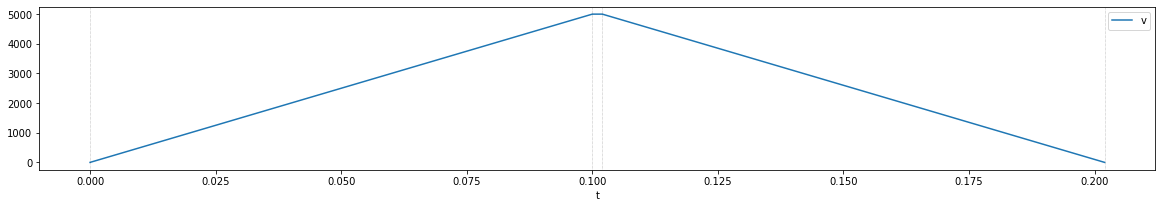

In [43]:
# hex area returns 500 instead of 510
%reset -f
from trajectory.trapmath import * 
from trajectory.plot import plot_params

p = Params(x=510.0, t=0.202, t_a=0.1, t_c=0.002, t_d=0.1, x_a=250.00000000000006, x_c=10.0, x_d=249.99999999999994, v_0=0, 
       v_c=5000, v_1=0, v_0_max=5000, v_0_min=0, v_1_max=5000, v_1_min=0, v_max=5000, a_max=50000, t_min=0, d=1, 
       ip=InputParams(x=510, v_0=0, v_1=0, v_max=5000, a_max=50000), flag='FV', recalcs=0)

plot_params(p)
x, x_a, t_a, x_c, t_c, x_d, t_d = hex_area_p(p, return_parts=True)

assert round(x) == round(p.x), (x, p.x)


In [44]:
t = 3.1
p = Params(x=1000.0, t=3.1, t_a=0.00646, t_c=3.08708, t_d=0.00646, x_a=1.0432899999999998, x_c=997.1268399999999, x_d=1.0432899999999998, 
           v_0=0, v_c=323, v_1=0, v_0_max=5000, v_0_min=0, v_1_max=5000, v_1_min=0, v_max=5000, a_max=50000, 
           t_min=0.30000000000000004, d=1, ip={'x': 1000.0, 'v_0': 0, 'v_1': 0, 'v_max': 5000, 'a_max': 50000}, flag='C', recalcs=0)

ag = attrgetter(*'x t v_0 v_1 v_max a_max'.split())

#######

(x, t, v_0, v_1, v_max, a_max) = ag(p)
  
f = make_area_error_func(x, t, v_0, v_1, v_max, a_max)

rows = []
for vc in range(-200, int(v_max*1.1), 10):
    rows.append(dict(v_c=vc, err=f(vc)))
    
pd.DataFrame(rows).plot(x='v_c',y='err')

###

v_c = hex_v_c(*ag(p))
print("V_C", v_c)
update_params(p, t) # Should not crash


NameError: name 'pd' is not defined

In [45]:
# Moves result in a discontinuity

j = Joint(5_000, 50_000)
joints = [j]*3
x = 1000

sl = SegmentList(joints)   


moves = [
    [550, 0, 38], 
    [121, 244, 308]
]

for move in moves:
    s = sl.rmove(move)
   
print(sl)
sl.plot(); plt.show()

for c, n in sl.discontinuities:
    print('Before:',c,n)
    update_boundary_velocities(c.p, n.p, None)
    print('After: ',c,n)

sl_save = deepcopy(sl)
    
sl.plot(); plt.show()
sl.update_window(-1)
sl.plot(); plt.show()

NameError: name 'Joint' is not defined

In [46]:

sl = deepcopy(sl_save)
    
sl.plot(); plt.show()
print(sl)

print(sl[1][2].p)
sl.update_window(-1)
sl.update_window(-2)

print(sl)
sl.plot(); plt.show()

NameError: name 'deepcopy' is not defined

In [47]:
min_time_parameters(x=65, v_0=5000, v_1=0, v_max=5000, a_max=50000)

NameError: name 'min_time_parameters' is not defined

In [48]:
p = Params(x=307.95552, t=0.15696, t_a=0.07848, t_c=0.0, t_d=0.07848, x_a=153.97776, x_c=0.0, x_d=153.97776, v_0=1948.786288950125, v_c=3924, 
           v_1=0, v_0_max=5000, v_0_min=0, v_1_max=0, v_1_min=0, v_max=5000, a_max=50000, t_min=0.15696, d=1, 
           ip={'x': 308.0, 'v_0': 1948.786288950125, 'v_1': 0, 'v_max': 5000, 'a_max': 50000}, flag='C', recalcs=1)

print(p.v_0)
print(min_time_parameters_p(sl[1][2].p).v_0)

ag = attrgetter(*'x t v_0 v_1 v_max a_max'.split())


hex_v_c(*ag(p))


1948.786288950125


NameError: name 'min_time_parameters_p' is not defined

In [49]:
# Moves crash 

j = Joint(5_000, 50_000)
joints = [j]*3
x = 1000

sl = SegmentList(joints)   


moves = [
    [500, 0, 38], 
    [121, 244, 308]
]

for move in moves:
    s = sl.rmove(move)

print(sl)
sl.plot(); plt.show()

for c, n in sl.discontinuities:
    print('Before:',c,n)
    update_boundary_velocities(c.p, n.p, None)
    print('After: ',c,n)

sl.plot(); plt.show()
sl.update_window(-1)
sl.plot(); plt.show()

NameError: name 'Joint' is not defined